In [ ]:
!pip install jsonlines

In [ ]:
!pip install tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json

# Function to read JSONL files
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Read JSONL files into dataframes
test_seen_data = read_jsonl('/content/drive/MyDrive/hateful_memes/test_seen.jsonl')
test_seen_df = pd.DataFrame(test_seen_data)

test_unseen_data = read_jsonl('/content/drive/MyDrive/hateful_memes/test_unseen.jsonl')
test_unseen_df = pd.DataFrame(test_unseen_data)

dev_seen_data = read_jsonl('/content/drive/MyDrive/hateful_memes/dev_seen.jsonl')
dev_seen_df = pd.DataFrame(dev_seen_data)

dev_unseen_data = read_jsonl('/content/drive/MyDrive/hateful_memes/dev_unseen.jsonl')
dev_unseen_df = pd.DataFrame(dev_unseen_data)
data_train_data = read_jsonl('/content/drive/MyDrive/hateful_memes/train.jsonl')
data_train_df = pd.DataFrame(data_train_data)

In [ ]:
# Save dataframes as CSV files
test_seen_df.to_csv('test_seen.csv', index=False)
test_unseen_df.to_csv('test_unseen.csv', index=False)
dev_seen_df.to_csv('dev_seen.csv', index=False)
dev_unseen_df.to_csv('dev_unseen.csv', index=False)
data_train_df.to_csv('data_train.csv', index=False)

In [ ]:
test_seen_df.describe()

,label
count,1000.00000
mean,0.49000
std,0.50015
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [ ]:
columns = data_train_df.columns
print(columns)

Index(['id', 'img', 'label', 'text'], dtype='object')


In [10]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/hateful_memes/data_train.csv")
data

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8500 non-null   int64 
 1   img     8500 non-null   object
 2   label   8500 non-null   int64 
 3   text    8500 non-null   object
dtypes: int64(2), object(2)
memory usage: 265.8+ KB


In [ ]:
data.nunique()

id       8500
img      8500
label       2
text     7072
dtype: int64

In [ ]:
duplicates = data[data['text'].duplicated()]
duplicates


,id,img,label,text
172,51763,img/51763.png,1,go be gay somewhere else
267,35097,img/35097.png,0,meanwhile at the isis strip club
389,94823,img/94823.png,0,obama voters
498,60937,img/60937.png,0,mississippi wind chime
557,40965,img/40965.png,0,obama voters
...,...,...,...,...
8348,13806,img/13806.png,1,opens ice cream shop only sells shakes
8401,2815,img/02815.png,1,how do i like my eggs? same as i like my nigge...
8422,89412,img/89412.png,1,does anyone know where i can get a rag? there'...
8440,59862,img/59862.png,1,it isn't islamophobia when they really are try...


In [ ]:
exact_duplicates = duplicates[duplicates.duplicated(subset='text', keep=False)]
exact_duplicates

,id,img,label,text
5635,52407,img/52407.png,0,"""where did you learn to make kool-aid like tha..."
1423,79451,img/79451.png,1,"""where did you learn to make kool-aid like tha..."
7274,61037,img/61037.png,1,"a girl asks her mom, ""why am i black and you'r..."
3791,1653,img/01653.png,0,"a girl asks her mom, ""why am i black and you'r..."
7064,7239,img/07239.png,0,a head diaper is required when you have shit f...
...,...,...,...,...
4785,60759,img/60759.png,1,you see this pig? it's called muhammad
6005,9432,img/09432.png,0,you've been hungerstruck!!
6302,36789,img/36789.png,0,you've been hungerstruck!!
3512,23415,img/23415.png,0,your purchase of $19.99 comes to $21.36 after ...


**DOING THIS TO UNDERSTAND THE RELATION BETWEEN TEXT AND THE LABELS**

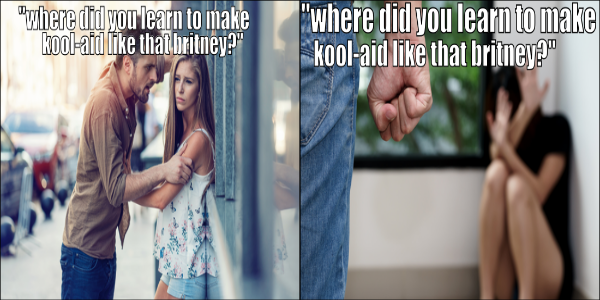

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


image_path3 = "/content/drive/MyDrive/hateful_memes/img/52407.png"
image_path4 = "/content/drive/MyDrive/hateful_memes/img/79451.png"
img3 = cv2.imread(image_path3)
img4 = cv2.imread(image_path4)

# Resize both images to 300x300
img3_resized = cv2.resize(img3, (300, 300))
img4_resized = cv2.resize(img4, (300, 300))

# Concatenate the images horizontally
concatenated_img = cv2.hconcat([img3_resized, img4_resized])

cv2_imshow(concatenated_img)

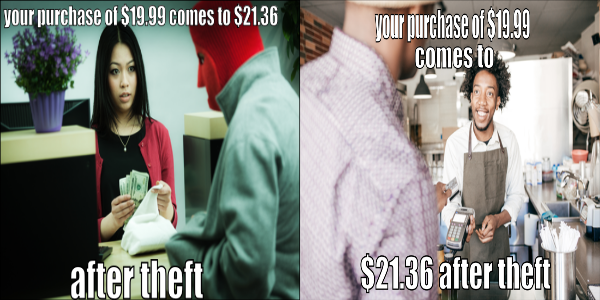

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
image_path3 = "/content/drive/MyDrive/hateful_memes/img/23415.png"
image_path4 = "/content/drive/MyDrive/hateful_memes/img/21693.png"

img3 = cv2.imread(image_path3)
img4 = cv2.imread(image_path4)

img3_resized = cv2.resize(img3, (300, 300))
img4_resized = cv2.resize(img4, (300, 300))

concatenated_img = cv2.hconcat([img3_resized, img4_resized])

cv2_imshow(concatenated_img)



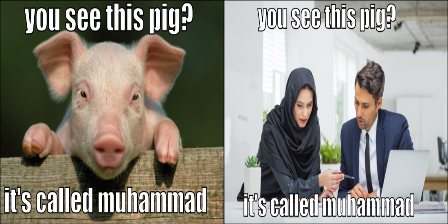

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image_path3 = "/content/drive/MyDrive/hateful_memes/img/40651.png"
image_path4 = "/content/drive/MyDrive/hateful_memes/img/60759.png"
img3 = cv2.imread(image_path3)
img4 = cv2.imread(image_path4)
height, width, _ = img3.shape
img4_resized = cv2.resize(img4, (width, height))
concatenated_img = cv2.hconcat([img3, img4_resized])
cv2_imshow(concatenated_img)

Here based on the analysis of the column text,it can be inferred that out of 8500 images-

1.**7072 image texts are unique**

2.**1428 image texts are duplicates**

3.**Out of the 1428 image texts,554 image texts are exact duplicates**

In the exact duplicates,I took around 3 examples(6 images) to analyze the correlation between text and label,there are very few cases where the label is the same for both the images(though I don't agree with a few labels).

So,evidently the action of the image also needs to be analyzed,so also with the text we also need to analyze the action in the scene(we can use image captioning).


In [ ]:
label_counts = data['label'].value_counts()
print(label_counts)



0    5481
1    3019
Name: label, dtype: int64



We find that the training data is imbalanced and is skewed towards the negative dataset,to rectify this,we will tackle this with oversampling/undersampling in the coming tasks


In [ ]:
import cv2

im1 = cv2.imread('/content/drive/MyDrive/hateful_memes/img/01235.png')
im2 = cv2.imread('/content/drive/MyDrive/hateful_memes/img/01236.png')
im3 = cv2.imread('/content/drive/MyDrive/hateful_memes/img/01243.png')
print(im1.shape,im2.shape,im3.shape)

(366, 550, 3) (224, 224, 3) (800, 525, 3)


Since the images have different sizes,It is better to resize the images to a multiple of 32(224 x 224) to match the stride requirements of YoloV8 model and also to make the processing faster(1:30 hr before resizing vs 20 min after resizing)

In [ ]:
from PIL import Image
import os

image_file_path = '/content/drive/MyDrive/hateful_memes/img'

# Output directory for resized images
output_dir = '/content/drive/MyDrive/hateful_memes/resized_imgs'

# Resize images to 224x224 pixels and save them in the output directory
def load_and_preprocess_image(file_path):
    img = Image.open(file_path)
    # Resize the image to 224x224 pixels
    img = img.resize((224, 224))
    # Save the resized image
    filename = os.path.basename(file_path)
    output_path = os.path.join(output_dir, filename)
    img.save(output_path)
    return img

# Loop through all image files in the directory and preprocess them
for filename in os.listdir(image_file_path):
    if filename.endswith(('.png')):  # Process only image files
        file_path = os.path.join(image_file_path, filename)
        load_and_preprocess_image(file_path)


In [2]:
!pip install opencv-python

In [3]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 4.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

In [12]:
model=YOLO("yolov8m.pt")

In [ ]:
results=model.predict("/content/drive/MyDrive/Hateful_memes_resized",stream=True)

In [ ]:
# Initialize dictionaries to store the counts and total probability for each object type
object_counts = {}
object_total_probability = {}
object_probabilities = {}

# Threshold for confidence scores
threshold = 0.5

# Iterate through each result
for result in results:
    if len(result) > 0:
        pred = result[0]
        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            conf = round(box.conf[0].item(), 2)

            # Apply threshold
            if conf > threshold:
                cords = box.xyxy[0].tolist()
                cords = [round(x) for x in cords]
                if class_id not in object_counts:
                    object_counts[class_id] = 1
                    object_total_probability[class_id] = conf
                    object_probabilities[class_id] = [conf]
                else:
                    object_counts[class_id] += 1
                    object_total_probability[class_id] += conf
                    object_probabilities[class_id].append(conf)

                print("Object type:", class_id)
                print("Coordinates:", cords)
                print("Probability:", conf)
                print("---")


Streaming output truncated to the last 5000 lines.
Object type: person
Coordinates: [1, 0, 179, 223]
Probability: 0.68
---
image 11606/12140 /content/drive/MyDrive/Hateful_memes_resized/94860.png: 640x640 1 person, 18.2ms
Object type: person
Coordinates: [8, 49, 83, 209]
Probability: 0.89
---
Object type: person
Coordinates: [113, 108, 172, 212]
Probability: 0.88
---
Object type: person
Coordinates: [60, 36, 97, 199]
Probability: 0.81
---
Object type: person
Coordinates: [105, 63, 152, 196]
Probability: 0.7
---
image 11607/12140 /content/drive/MyDrive/Hateful_memes_resized/94861.png: 640x640 4 persons, 17.8ms
Object type: person
Coordinates: [2, 56, 200, 184]
Probability: 0.84
---
image 11608/12140 /content/drive/MyDrive/Hateful_memes_resized/94870.png: 640x640 1 person, 1 spoon, 1 bowl, 1 potted plant, 18.3ms
Object type: person
Coordinates: [89, 139, 199, 224]
Probability: 0.96
---
Object type: person
Coordinates: [30, 135, 119, 223]
Probability: 0.77
---
image 11609/12140 /content/d

In [ ]:
print("Object Counts, Average Probability, and Probabilities:")
sorted_object_counts = sorted(object_counts.items(), key=lambda x: x[1], reverse=True)
for class_id, count in sorted_object_counts:
    average_probability = object_total_probability[class_id] / count
    probabilities = object_probabilities[class_id]
    print(f"{class_id}: Count={count}, Average Probability={average_probability}, Probabilities={probabilities}")


Object Counts, Average Probability, and Probabilities:
person: Count=19003, Average Probability=0.7949976319528652, Probabilities=[0.92, 0.75, 0.64, 0.6, 0.52, 0.93, 0.77, 0.88, 0.91, 0.9, 0.79, 0.86, 0.91, 0.89, 0.68, 0.66, 0.59, 0.82, 0.92, 0.9, 0.86, 0.85, 0.84, 0.54, 0.52, 0.94, 0.8, 0.92, 0.87, 0.75, 0.64, 0.58, 0.86, 0.81, 0.95, 0.87, 0.9, 0.85, 0.81, 0.87, 0.84, 0.57, 0.76, 0.95, 0.8, 0.78, 0.59, 0.6, 0.89, 0.53, 0.87, 0.71, 0.66, 0.66, 0.56, 0.52, 0.9, 0.71, 0.65, 0.55, 0.51, 0.92, 0.86, 0.84, 0.88, 0.6, 0.94, 0.89, 0.88, 0.85, 0.85, 0.81, 0.79, 0.76, 0.72, 0.72, 0.64, 0.51, 0.94, 0.76, 0.72, 0.83, 0.85, 0.9, 0.86, 0.9, 0.59, 0.92, 0.93, 0.82, 0.8, 0.74, 0.91, 0.67, 0.9, 0.84, 0.63, 0.86, 0.94, 0.84, 0.51, 0.91, 0.69, 0.84, 0.9, 0.9, 0.86, 0.83, 0.82, 0.78, 0.74, 0.59, 0.54, 0.92, 0.85, 0.72, 0.72, 0.57, 0.53, 0.86, 0.84, 0.74, 0.82, 0.93, 0.9, 0.94, 0.65, 0.59, 0.97, 0.94, 0.96, 0.64, 0.86, 0.93, 0.77, 0.61, 0.88, 0.88, 0.79, 0.91, 0.71, 0.84, 0.92, 0.94, 0.9, 0.89, 0.81, 0.78

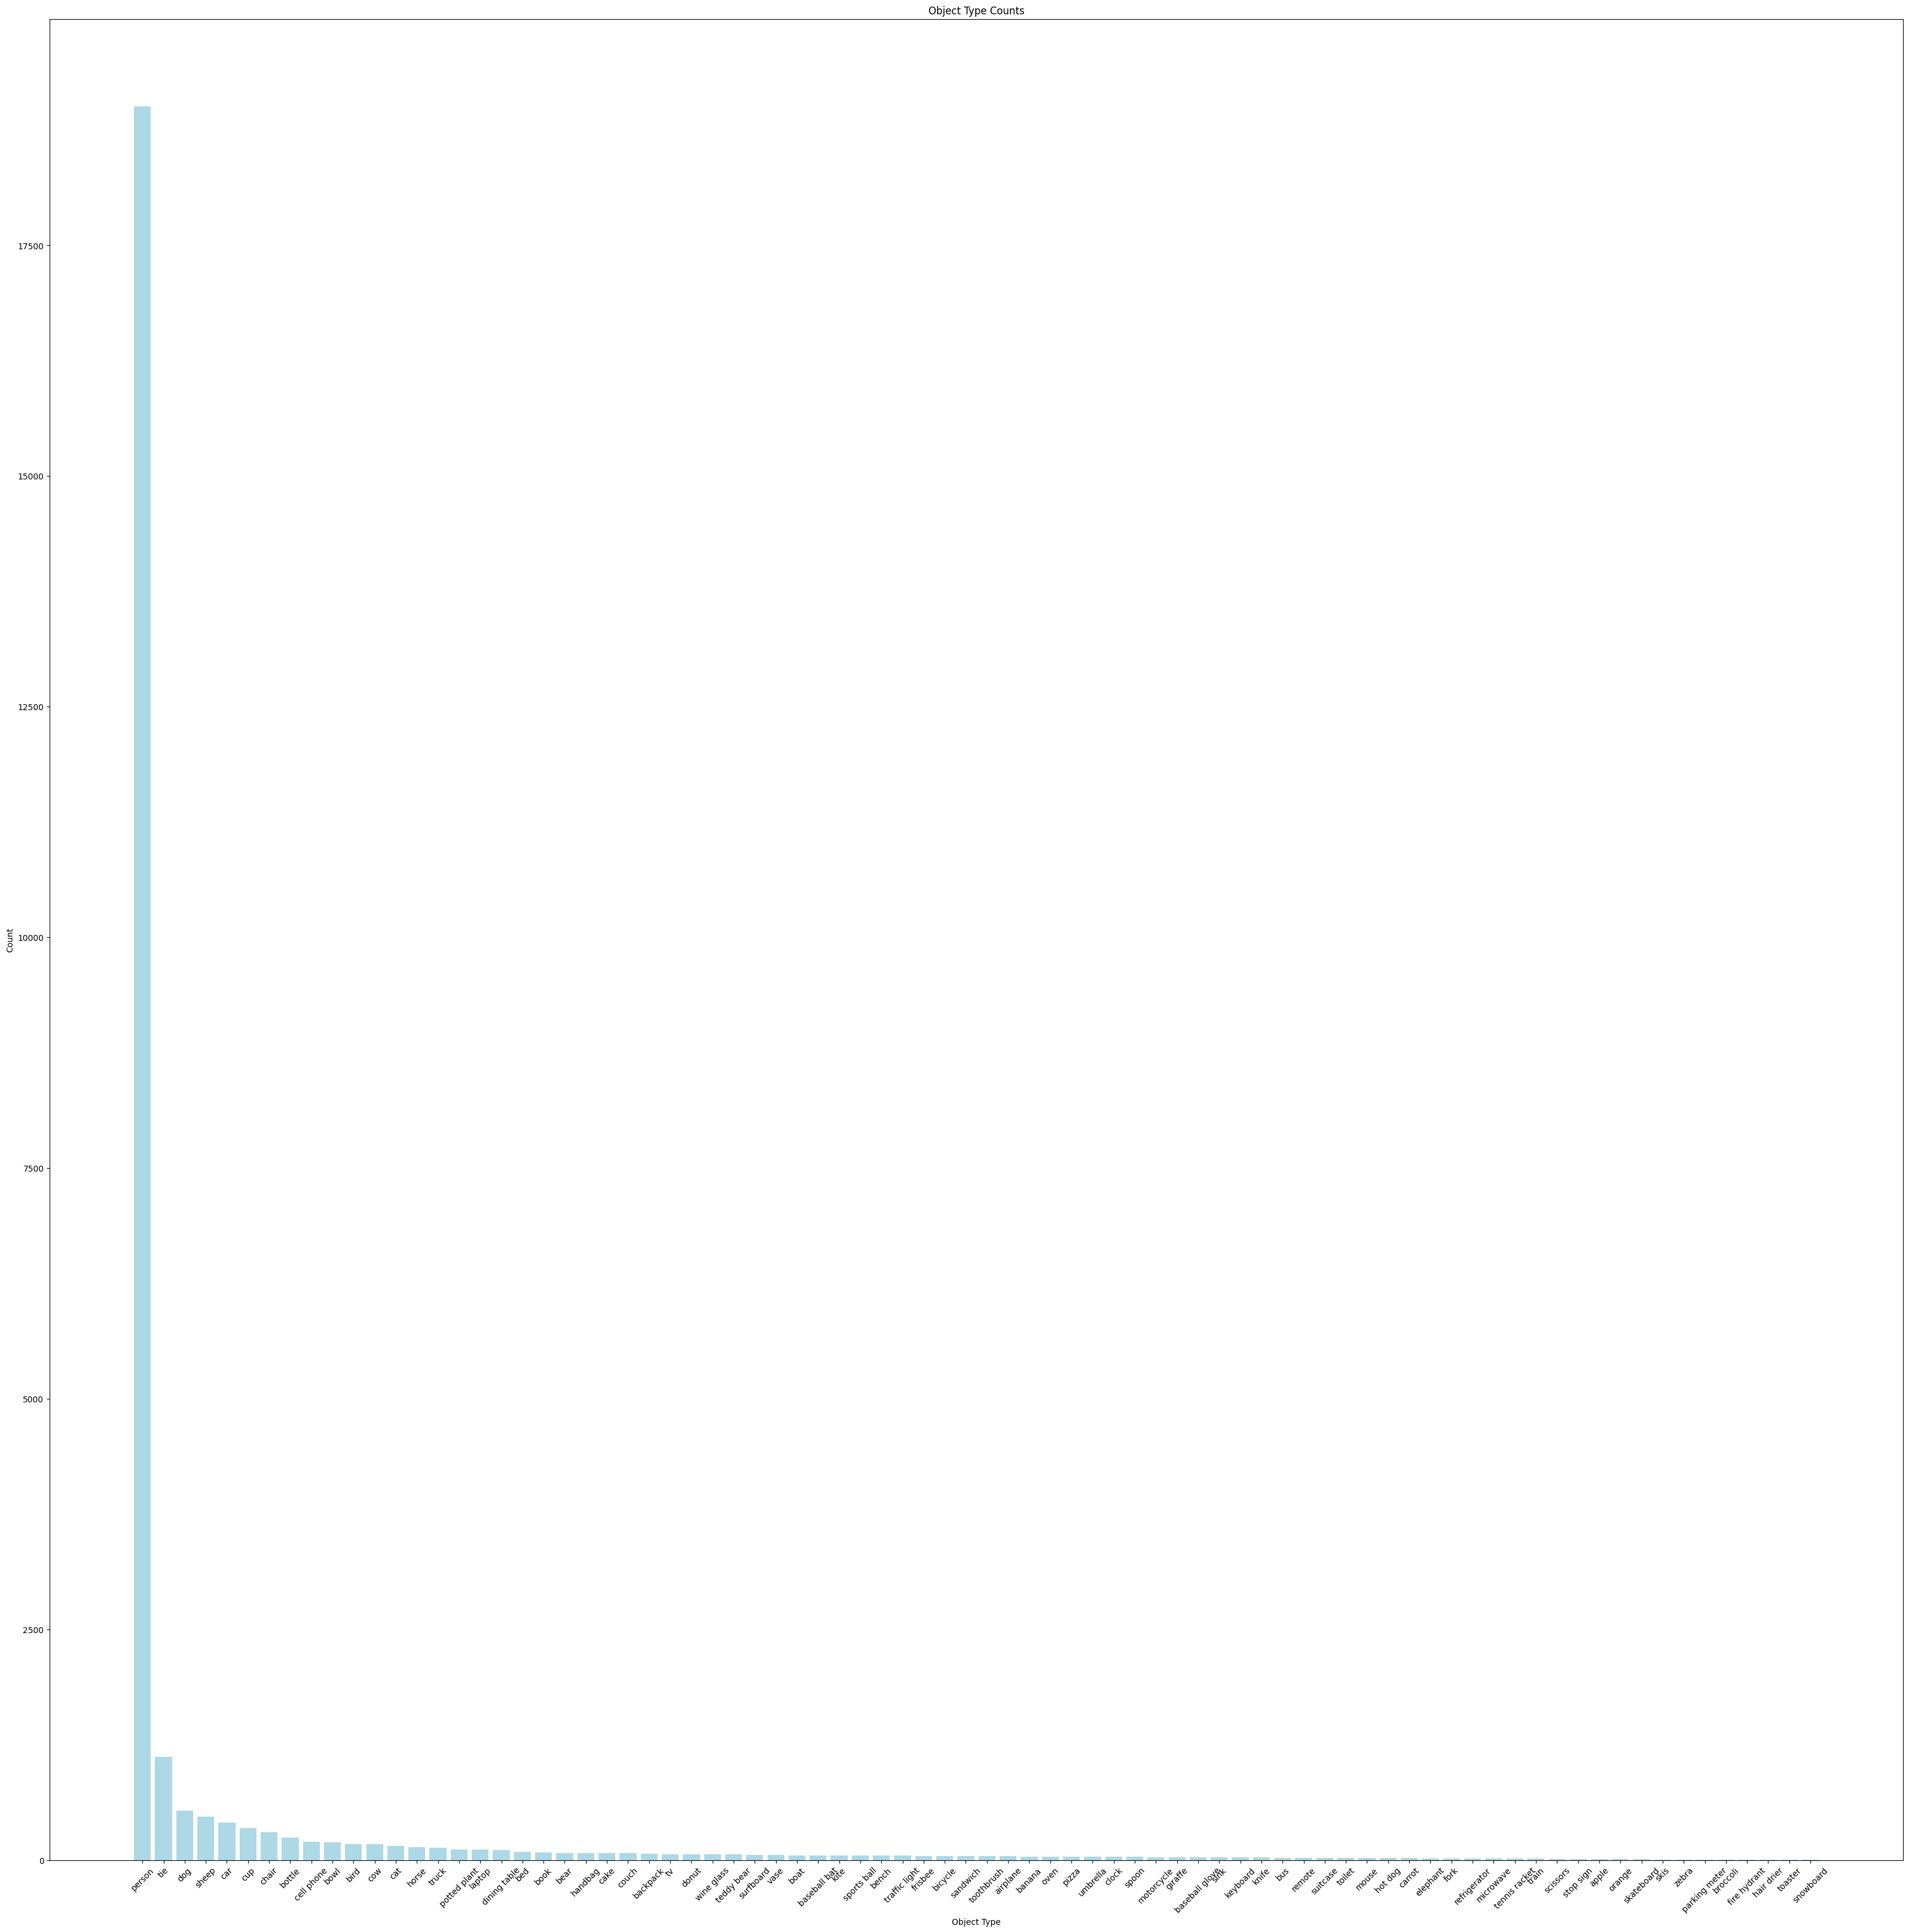

In [ ]:
import matplotlib.pyplot as plt

# Convert sorted_object_counts to a dictionary for easy access
sorted_object_counts_dict = dict(sorted_object_counts)

plt.figure(figsize=(40, 40))
plt.bar(sorted_object_counts_dict.keys(), sorted_object_counts_dict.values(), color='lightblue')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.title('Object Type Counts')
plt.xticks(rotation=45)
plt.show()


In the resized dataset,I have set a threshold of 0.5 for the object detection.
It is observed that the person object class is the most occuring and it is disproportionately large and any analysis done will be useless,so better ways of classification is necessary.

One way to do it would be to subdivide the people object based on their sex and skin(white and non white).

So for further analysis,auto annotation of the images can be done to find the required labels.

Note-I have decided not to pursue this method as I did not have enough annotated images to get an accuracy of 70-80%.

My yolov8 pre trained model was trained on 1500 annotated images(done using roboflow).It only achieved about a 55% precision and recall of 60%.Due to this i have decided to forgo this idea.